# Project Objectives
- Document code, process, findings, and key takeaways.
- Make your process repeateable and your report (notebook) easy to read and follow.
- Ask exploratory questions of your data. Answer questions through charts and statistical tests.
- Construct a model to predict tax value ("tax value") using classification techniques.
- Refine your work into a Report.
- Be prepared to answer panel questions.

## Business Goals
- Find drivers for tax value with zillow data. Why are can help predict tax value?
- Construct a ML classification model that accurately predicts tax value.
- Deliver a report that a non-data scientist can read through and understand what steps were taken, why and what was the outcome?

In [11]:
#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
import scipy.stats as stats
import sklearn.impute as simpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler


import acquire
import prepare
import explore
import env

univariate
    continous
        - histogram
        - boxplot
        - displot
    discrete
        - countplot


bi-/mulit-variate
    continous with continous
        - scatter
        - line
        - pair
        - heat map
        - relplot
    discrete with continous
        - violin
        - catplot
        - sunburst?
        - boxplot
        - swarmplot
        - striplot
    discrete with discrete
        - heatmap
        -
        -


> - ## Acquired the data
> - did basic cleaning (removed whitespaces, dropped nulls, removed outliers), 
> - added decade based on years


> - ## Return as a prep file with splits
> - listed for categorical and numerical
> - do univariate exploration

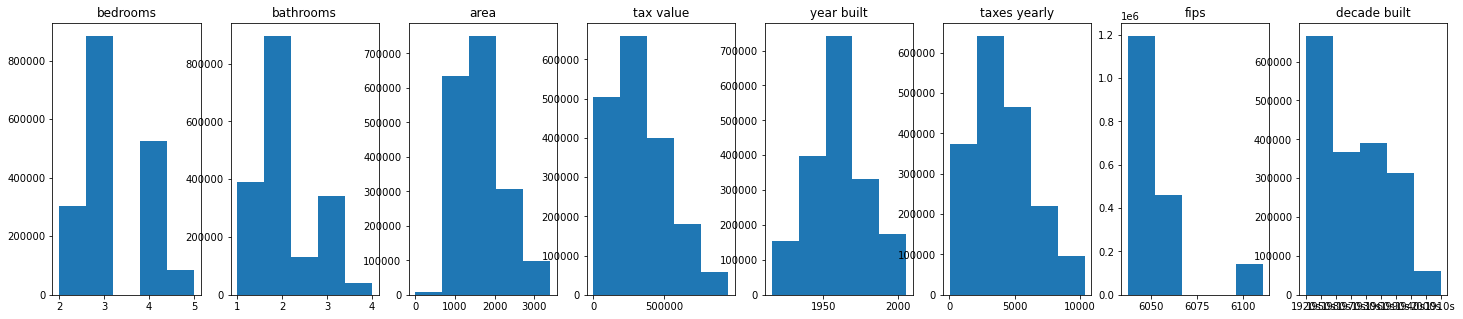

In [12]:
df0,df,train,validate,test = prepare.prep_zillow()

cat_vars = ["bedrooms","bathrooms","decade built","fips"] # the categorical variables
num_vars = ["area","tax value", "taxes yearly"] # the numerical variables
##checking the distribution now that the outliers are removed

plt.figure(figsize=(25, 5))
for i, col in enumerate(df.columns.tolist()): # List of columns
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    plt.subplot(1,len(df.columns.tolist()), plot_number) # Create subplot.
    plt.title(col) # Title with column name.
    df[col].hist(bins=5) # Display histogram for column.
    plt.grid(False) # Hide gridlines.

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

## This section will be going over exploration

### Bivariate exploration

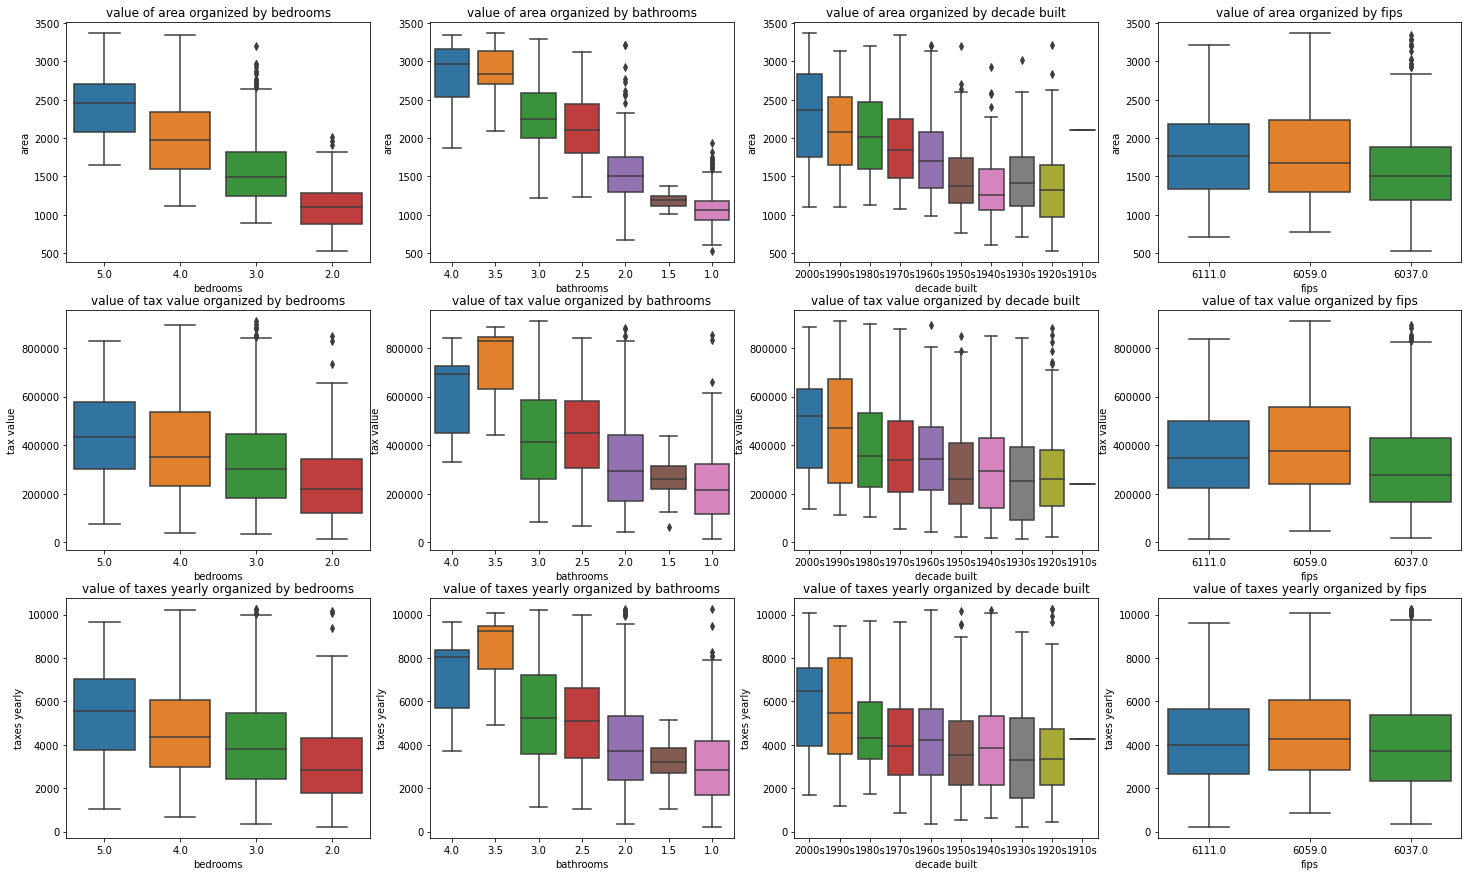

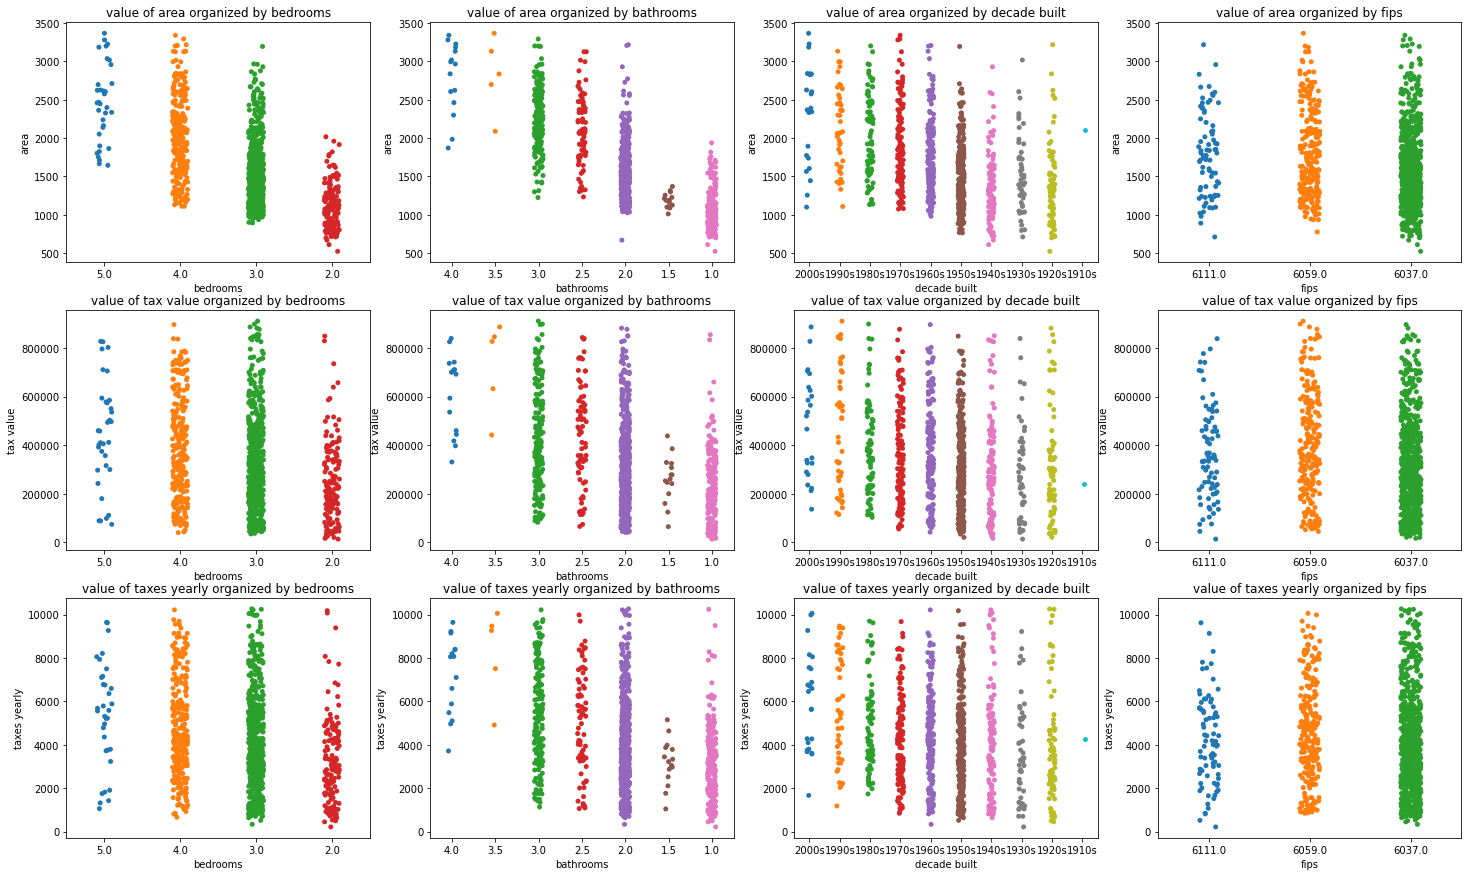

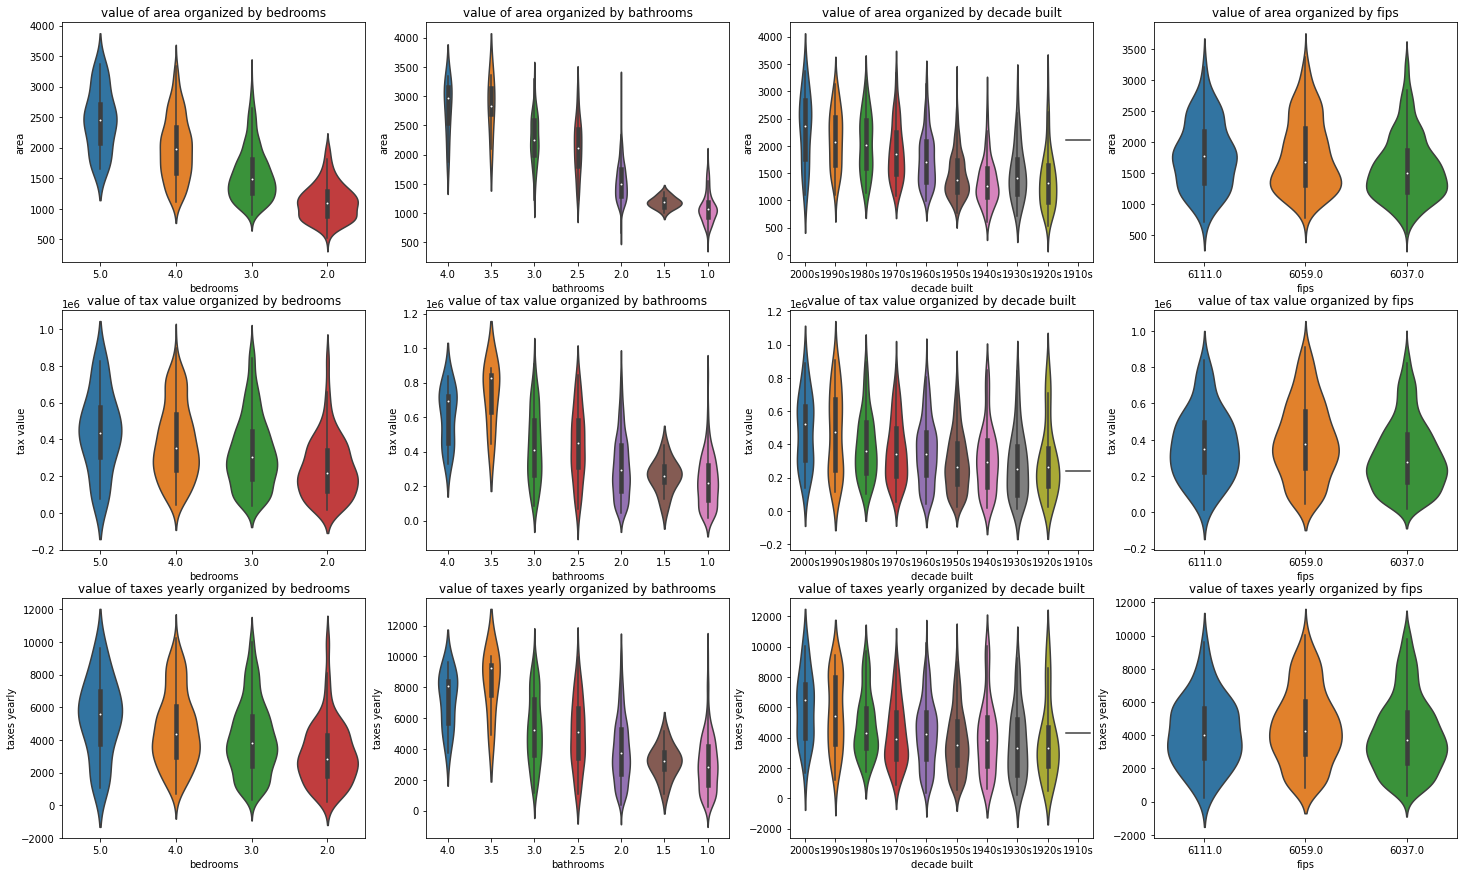

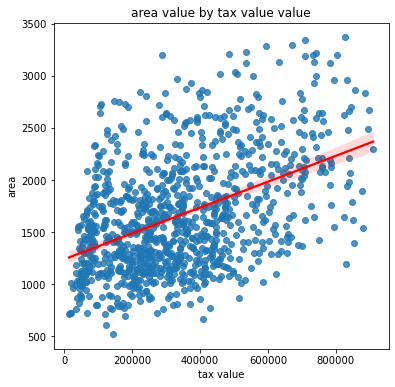

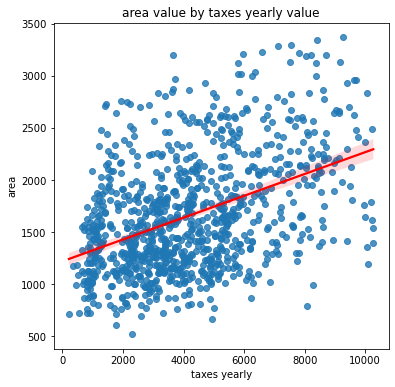

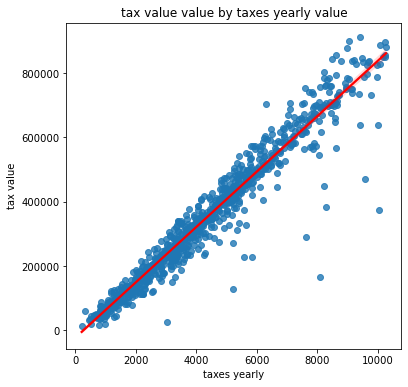

<Figure size 432x432 with 0 Axes>

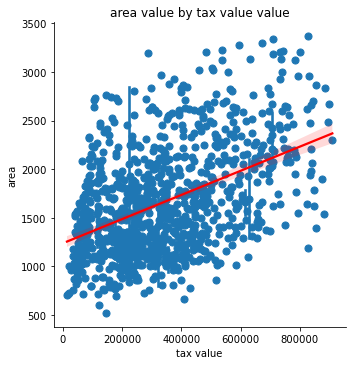

<Figure size 432x432 with 0 Axes>

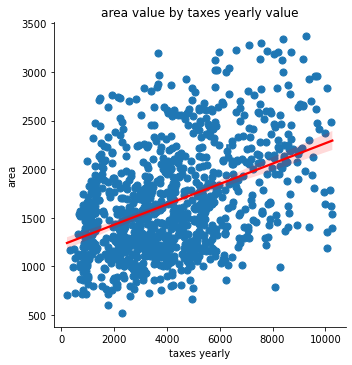

<Figure size 432x432 with 0 Axes>

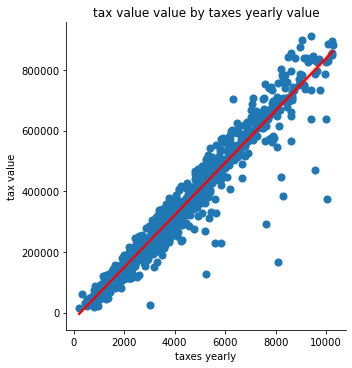

<Figure size 432x432 with 0 Axes>

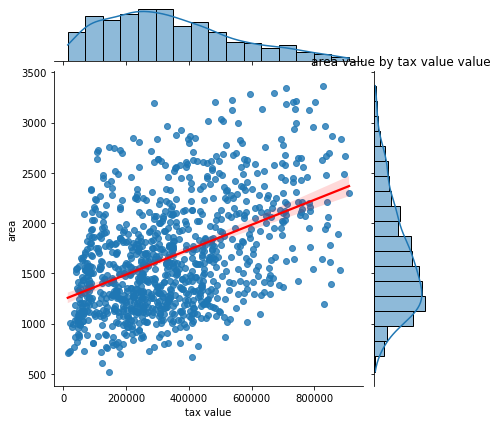

<Figure size 432x432 with 0 Axes>

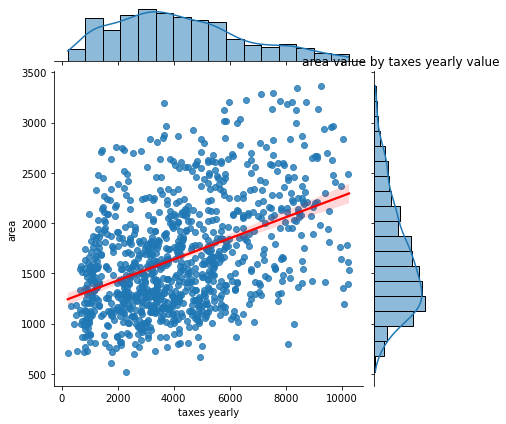

<Figure size 432x432 with 0 Axes>

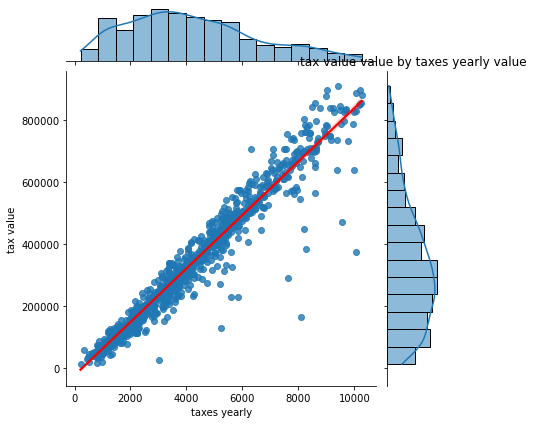

In [13]:
explore.plot_categorical_and_continuous_vars(train,num_vars,cat_vars)
explore.plot_variable_pairs(train,num_vars)

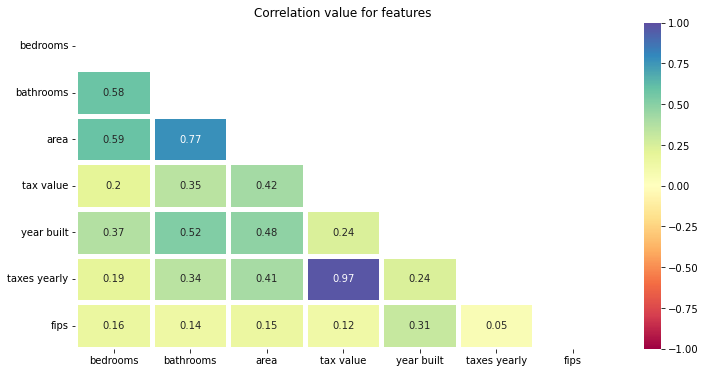

In [14]:
## create a heatmap of relationships between the variables

plt.figure(figsize=(12, 6))
kwargs = {'alpha':1,
        'linewidth':5, 
        'linestyle':'--',
        'linecolor':'white'}

sns.heatmap(    train.corr(),
                #map="YlGnBu", 
                cmap="Spectral",
                mask=(np.triu(np.ones_like(train.corr(),dtype=bool))),
                annot=True,
                vmin=-1, 
                vmax=1, 
                #annot=True,
                **kwargs
                )
plt.title("Correlation value for features")
plt.show()

# Heatmap takeaways:
strong relationship between tax value and  taxes yearly (makes sense since your taxes yearly is based off tax value)

as well as area and bathrooms (also makes sense, larger house has more room for bathroom)




> - **Hypothesis 1 -** 
> - alpha = .05
> - $H_0$ = "That the distributions underlying the samples of Tax Value and Taxes Yearly are unrelated"
> -
> - $H_a$: "That the distributions underlying the samples of Tax Value and Taxes Yearly are related"

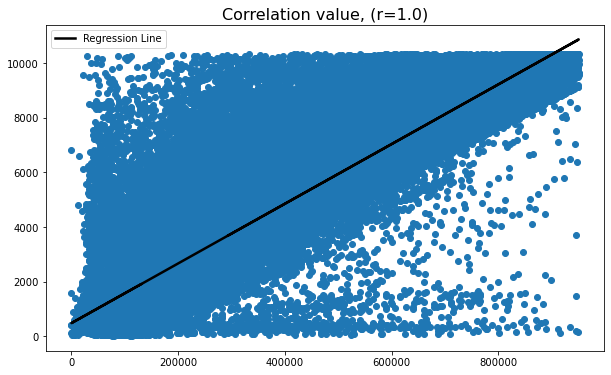

r = 0.970309851214055

 We reject the null Hypothesis ( T̶h̶a̶t̶ ̶t̶h̶e̶ ̶d̶i̶s̶t̶r̶i̶b̶u̶t̶i̶o̶n̶s̶ ̶u̶n̶d̶e̶r̶l̶y̶i̶n̶g̶ ̶t̶h̶e̶ ̶s̶a̶m̶p̶l̶e̶s̶ ̶o̶f̶ ̶T̶a̶x̶ ̶V̶a̶l̶u̶e̶ ̶a̶n̶d̶ ̶T̶a̶x̶e̶s̶ ̶Y̶e̶a̶r̶l̶y̶ ̶a̶r̶e̶ ̶u̶n̶r̶e̶l̶a̶t̶e̶d̶ ) p=0.00000


In [15]:
## putting tax value and taxes yearly into a pearsonr and then graphing it for a visual result as a result
## of the heat map above highlighting a good possibility of a relation


H0 = "That the distributions underlying the samples of Tax Value and Taxes Yearly are unrelated"
Ha = "That the distributions underlying the samples of Tax Value and Taxes Yearly are related"
alpha = .05


r, p = stats.pearsonr(train["tax value"],train["taxes yearly"])


plt.figure(figsize=(10,6))
plt.scatter( train["tax value"], train["taxes yearly"])
b, a = np.polyfit(train["tax value"], train["taxes yearly"], deg=1)
plt.plot(train["tax value"], a + b * train["tax value"], color="k", lw=2.5,label="Regression Line")
plt.title(f'Correlation value, (r={round(r,1)})', size=16)
plt.legend()
plt.show()



print('r =', r)

if p > alpha:
    print("\n We fail to reject the null hypothesis (",(H0) , ")",'p=%.5f' % (p))
else:
     print("\n We reject the null Hypothesis (", '\u0336'.join(H0) + '\u0336' ,")", 'p=%.5f' % (p))


### Correlation/PearsonR takeaway
- here we have a statistical test of PearsonR validating that there is a relationship between Tax Value and Taxes yearly with a relationship value of .97. this will be useful knowledge in our modelling

Continuing exploration of the heat map, we will test the Tax Value mean of each FIPs to see if there is a difference in the means based on location

> - **Hypothesis 2 -** 
> - alpha = .05
> - $H_0$ = "Tax value of FIPS has identical average values to Tax value of other FIPS"
> - $\mu_{Tax Value (FIPS-1)} <= \mu_{Tax Value (FIPS-2)}$.
> -
> - $H_a$: "Tax value of FIPS is not equal to Tax value of other FIPS"
> - $\mu_{Tax Value (FIPS-1)} > \mu_{Tax Value (FIPS-2)}$. 

-----------------------------
we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=7342.98970, p=0.00000

 We reject the null Hypothesis ( T̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶F̶I̶P̶S̶6̶0̶5̶9̶.̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶T̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶F̶I̶P̶S̶6̶0̶3̶7̶.̶0̶ ) t=167.70401, p=0.00000
-----------------------------
we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=424.40024, p=0.00000

 We reject the null Hypothesis ( T̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶F̶I̶P̶S̶6̶1̶1̶1̶.̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶T̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶F̶I̶P̶S̶6̶0̶3̶7̶.̶0̶ ) t=82.57368, p=0.00000
-----------------------------
we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=895.04749, p=0.00000

 We reject the null Hypothesis ( T̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶F̶I̶P̶S̶6̶1̶1̶1̶.̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶

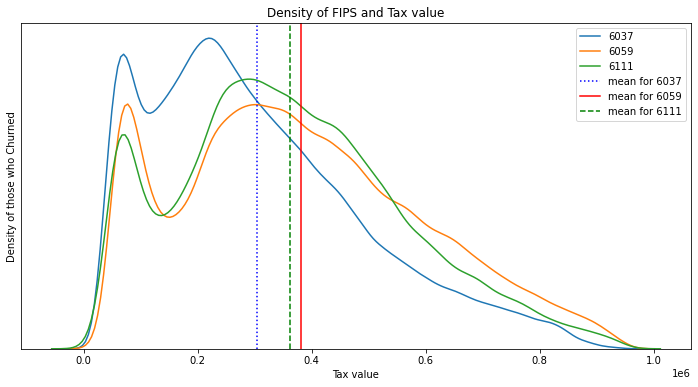

In [16]:
## does a levene test for comparing variance, creates a boolean flag that is passed into the ttest for
## comparing the churned monthly charge and the unchurned monthly charge
## then plots the graphs for a visual


alpha = .05

for fips1 in train.fips.unique():
    for fips2 in train.fips.unique():
        if not train.fips.unique().tolist().index(fips2) >= train.fips.unique().tolist().index(fips1):
            H0 = f"Tax value of FIPS{fips1} has identical average values to Tax value of other FIPS{fips2}"
            Ha = "Tax value of FIPS is not equal to Tax value of other FIPS"
            print("-----------------------------")
            #compare variances to know how to run the test
            stat,pval = stats.levene(train[train.fips == fips1]["tax value"],train[train.fips == fips2]["tax value"])
            stat,pval
            if pval > 0.05:
                equal_var_flag = True
                print(f"we can accept that there are equal variance in these two groups with {round(pval,2)} certainty Flag=T",'stat=%.5f, p=%.5f' % (stat,pval))
            else:
                equal_var_flag = False
                print(f"we can reject that there are equal variance in these two groups with {round((1-pval),2)} certainty Flag=F",'stat=%.5f, p=%.5f' % (stat,pval))


            t, p = stats.ttest_ind( train[train.fips == fips1]["tax value"], train[train.fips == fips2]["tax value"], equal_var = equal_var_flag )

            if p > alpha:
                print("\n We fail to reject the null hypothesis (",(H0) , ")",'t=%.5f, p=%.5f' % (t,p))
            else:
                print("\n We reject the null Hypothesis (", '\u0336'.join(H0) + '\u0336' ,")",'t=%.5f, p=%.5f' % (t,p))

plt.figure(figsize=(12,6))
plt.title(f"Density of FIPS and Tax value")


plt.ylabel("Density of those who Churned")
plt.yticks([],[])


sns.kdeplot(train[train.fips == train.fips.unique()[0]]["tax value"],label=f"{train.fips.unique()[0].astype(int)}")
sns.kdeplot(train[train.fips == train.fips.unique()[1]]["tax value"],label=f"{train.fips.unique()[1].astype(int)}")
sns.kdeplot(train[train.fips == train.fips.unique()[2]]["tax value"],label=f"{train.fips.unique()[2].astype(int)}")

plt.axvline(train[train.fips == train.fips.unique()[0]]["tax value"].mean(),
            color="blue",
            ls=":",
            label=f"mean for {train.fips.unique()[0].astype(int)}")
plt.axvline(train[train.fips == train.fips.unique()[1]]["tax value"].mean(),
            color="red",
            ls="-",
            label=f"mean for {train.fips.unique()[1].astype(int)}")
plt.axvline(train[train.fips == train.fips.unique()[2]]["tax value"].mean(),
            color="green",
            ls="--",
            label=f"mean for {train.fips.unique()[2].astype(int)}")

plt.xlabel("Tax value")
plt.legend()
plt.show()

## Takeaway on TTest for FIPS and Tax Value
- the 2 sided TTest yielded interesting results in that the the samples of FIPS did varied enough to pass our statistical significance (alpha = .05). This would indicate that seperating the data by FIPS will result in a significant difference. This will be important for our modeling

-
-
-
-
-

In [17]:
train["bed/bath"] = train["bedrooms"]/train["bathrooms"]
train["yearly taxes per sqft"] = train["taxes yearly"] / train["area"]
train["tax value per taxes yearly per sqft"] = train["tax value"] / train["yearly taxes per sqft"] 
train["tax value binned"] = (((train["tax value"]//50_000)+0) *50_000).astype(int).astype(str) + "-" + (((train["tax value"]//50_000)+1) *50_000).astype(int).astype(str)
train["area binned"] = (((train["area"]//500)+0) *500).astype(int).astype(str) + "-" + (((train["area"]//500)+1) *500).astype(int).astype(str)

import plotly.express as px
import plotly

df = px.data.tips()
fig = px.scatter_3d( data_frame = train.sample(n=10000, random_state=123).sort_values(by=["decade built"]), 
                    #histfunc="avg",
                    z="tax value per taxes yearly per sqft", 
                    x="year built", 
                    y= "yearly taxes per sqft", 
                    #color="fips",
                    size= "taxes yearly",
                    size_max= 10,
                    symbol="fips",
                    #violinmode='overlay',
                    #marginal="box", # or violin, rug,
                    #points="all",
                    #nbins=10,
                   

                    hover_data=train.columns)

fig.update_xaxes(categoryorder='category ascending')
#fig.update_xaxes(categoryorder='total ascending')

fig.update_traces(marker_colorscale="blackbody",selector=dict(type='scatter'))

fig.update_layout(
    scene = dict(xaxis = dict(nticks=10, range=[1920,2010],),
                     yaxis = dict(nticks=6, range=[0,12],),
                     zaxis = dict(nticks=10, range=[0,500_000],),),
    autosize=False,
    width=1500,
    height=800,
    margin=dict(
        l=25,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

plotly.offline.iplot(fig, validate=False)

In [18]:
train["bed/bath"] = train["bedrooms"]/train["bathrooms"]
train["area by taxes yearly"] = train["area"]/train["taxes yearly"]
train["tax value per taxes yearly per sqft"] = train["tax value"] / train["yearly taxes per sqft"] 
train["tax value binned"] = (((train["tax value"]//50_000)+0) *50_000).astype(int).astype(str) + "-" + (((train["tax value"]//50_000)+1) *50_000).astype(int).astype(str)
train["area binned"] = (((train["area"]//500)+0) *500).astype(int).astype(str) + "-" + (((train["area"]//500)+1) *500).astype(int).astype(str)

train["area by bedrooms"] = train["area"] / train["bedrooms"]
train["tax value by taxes yearly"] = train["tax value"] / train["taxes yearly"]
train["taxes yearly by bed/bath"] = train["taxes yearly"] / train["bed/bath"]

import plotly.express as px
import plotly

df = px.data.tips()
fig = px.scatter_3d( data_frame = train.sample(n=10000, random_state=123).sort_values(by=["decade built"]), 
                    #histfunc="avg",
                    x="area by taxes yearly", 
                    z="tax value by taxes yearly", 
                    y= "taxes yearly by bed/bath", 
                    #color="fips",
                    size= "taxes yearly",
                    size_max= 10,
                    symbol="fips",
                   

                    hover_data=train.columns)

fig.update_xaxes(categoryorder='category ascending')
#fig.update_xaxes(categoryorder='total ascending')

fig.update_traces(marker_colorscale="blackbody",selector=dict(type='scatter'))

fig.update_layout(
    scene = dict(xaxis = dict(nticks=10, range=[0,3],),
                     yaxis = dict(nticks=6, range=[0,15000],),
                     zaxis = dict(nticks=10, range=[0,150],),),
    autosize=False,
    width=1500,
    height=800,
    margin=dict(
        l=25,
        r=50,
        b=25,
        t=25,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

plotly.offline.iplot(fig, validate=False)

In [19]:
train["last1"]=train["area"]/train["bedrooms"]/train["bathrooms"]
train.head()


bedrooms  bathrooms    area  tax value  year built  taxes yearly  \
1222525       2.0        1.0  1012.0   294422.0      1949.0       4149.40   
1382660       3.0        2.0  1961.0   627384.0      1953.0       7124.10   
2094882       3.0        2.0  1271.0   328921.0      1956.0       4027.52   
1791732       3.0        2.0  1474.0   542190.0      1927.0       6437.48   
933597        4.0        3.0  2268.0   540066.0      1973.0       6823.28   

           fips decade built  bed/bath  yearly taxes per sqft  \
1222525  6037.0        1940s  2.000000               4.100198   
1382660  6037.0        1950s  1.500000               3.632891   
2094882  6037.0        1950s  1.500000               3.168780   
1791732  6037.0        1920s  1.500000               4.367354   
933597   6037.0        1970s  1.333333               3.008501   

         tax value per taxes yearly per sqft tax value binned area binned  \
1222525                         71806.782667    250000-300000   1000-1500   
1382660                        172695.501748    600000-650000   1500-2000   
2094882                        103800.500308    300000-350000   1000-1500   
1791732                        124146.103755    500000-550000   1000-1500   
933597                         179513.326142    500000-550000   2000-2500   

         area by taxes yearly  area by bedrooms  tax value by taxes yearly  \
1222525              0.243891        506.000000                  70.955319   
1382660              0.275263        653.666667                  88.065019   
2094882              0.315579        423.666667                  81.668372   
1791732              0.228972        491.333333                  84.223951   
933597               0.332391        567.000000                  79.150497   

         taxes yearly by bed/bath       last1  
1222525               2074.700000  506.000000  
1382660               4749.400000  326.833333  
2094882               2685.013333  211.833333  
1791732               4291.653333  245.666667  
933597                5117.460000  189.000000

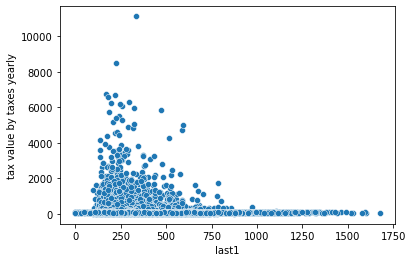

(0.0, 10000.0)

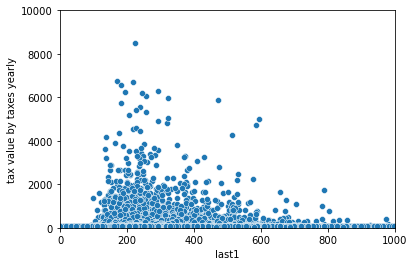

In [20]:
sns.scatterplot(data=train,x="last1",y="tax value by taxes yearly")
plt.show()
ax2=sns.scatterplot(data=train,x="last1",y="tax value by taxes yearly")
ax2.set_xlim(0,1000)
ax2.set_ylim(0,10_000)

<AxesSubplot:xlabel='bed/bath', ylabel='tax value per taxes yearly per sqft'>

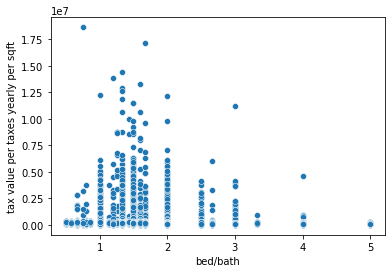

In [21]:
sns.scatterplot(data=train,y="tax value per taxes yearly per sqft",x="bed/bath")


In [22]:
#scale continous data

train_scaled = train.copy()

columns_to_scale = num_vars
scaler = MinMaxScaler()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])


In [23]:
X_train,X_validate = train[["taxes yearly"]],validate[["taxes yearly"]]
y_train,y_validate = train["tax value"],validate["tax value"]

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) ##only use fit_transform for training, after that use transform (equations are created)
X_validate_scaled = scaler.transform(X_validate)

Text(0.5, 1.0, 'Scaled')

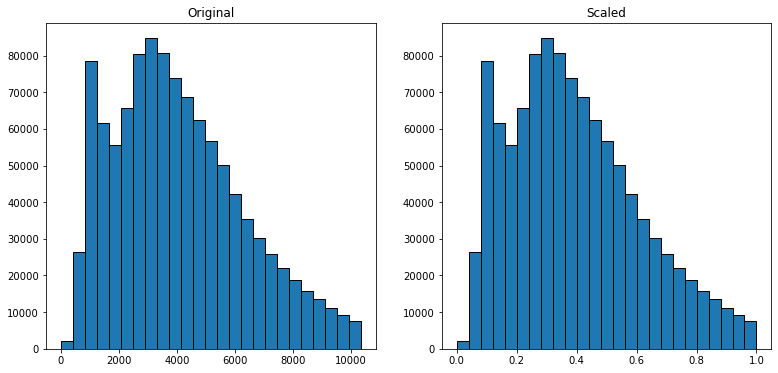

In [24]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

## playing with the data


bin_df = pd.DataFrame()
df = df[df["tax_value"]<500_000]

for col in temp_list:
    bin_df[f"{col} binned"] = pd.cut(df[col],5)
bin_df["fips"] = df.fips
bin_df["dummy"] = 1
bin_df



binned = bin_df.groupby(bin_df.drop(columns=["dummy"]).columns.tolist()).sum().reset_index()
binned = binned[binned.dummy > 0]
binned



import plotly.express as px
import plotly

s_list = [ 'fips','tax_value binned']

all = binned["dummy"].sum()
#binned["percentage"] = (round(((binned["dummy"]/all)*100),3).astype(str) + "%")
binned["percentage"] = (binned["dummy"]/all)

fig = px.sunburst(  binned, 
                    path=s_list,
                    labels=s_list,
                    values='dummy',
                    color = "tax_value binned"
                    )
plotly.offline.plot(fig, validate=False)


